In [2]:
# Importing the libraries
import numpy as np   # Used to making arrays
import pandas as pd   # Used to make dataframes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score   #Used to check the performance of model

In [3]:
#  Loading the dataset to a pandas Dataframe
credit_card_data = pd.read_csv('creditcard.csv')

In [4]:
# First 5 rows of datasets 
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Last 5 rows of datasets
credit_card_data.tail()

# In class section 0 represents Legit Transaction whereas 1 represents fruad transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Dataset Information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Distribution of legit transactions & fraud transactions
credit_card_data['Class'].value_counts()

# THIS DATASET IS HIGHLY UNBALANCED
# 0 --> Normal Transaction
# 1 --> Fraud Transaction

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
#  Seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
# Statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
# Statistical measures of the data
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


 Under-Sampling

 
 Build a sample dataset conatining similar distribution of normal transaction and fraud transaction

In [14]:
legit_sample = legit.sample(n = 492)

Concatenating two DataFrames

In [15]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
109410,71372.0,-0.914467,0.946105,1.619607,0.828965,0.333241,-0.124421,1.027089,-0.144718,-0.976700,...,0.149850,0.468929,-0.275427,0.129456,0.494504,-0.181443,-0.031099,0.104092,80.00,0
141298,84222.0,-0.781760,1.663926,1.133000,2.842814,-0.059588,-0.373819,0.815462,0.278144,-2.044487,...,0.108291,0.051562,-0.189217,0.378776,0.441786,0.356761,-0.100611,0.014324,53.89,0
259163,158991.0,1.910411,-1.480100,-0.670066,-1.612170,-1.438740,-0.784212,-0.757137,-0.067269,0.601989,...,-0.660953,-1.486920,0.438048,0.016001,-0.721423,-0.227173,-0.013743,-0.033460,110.69,0
116625,74362.0,-2.373312,2.412173,1.346232,2.699024,-0.542082,0.687460,-0.053392,0.352685,-0.651034,...,-0.187472,-0.719720,-0.074638,-0.147427,-0.064588,-0.168228,-2.122507,-0.757780,16.73,0
3539,3023.0,1.011780,-0.958000,-0.615193,-0.567758,0.102298,0.761944,-0.045637,0.033160,-1.405189,...,-0.764134,-2.237542,-0.042051,-1.766736,0.033490,0.073368,-0.050731,0.028456,215.18,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98183.888211,-0.023873,0.019962,-0.027961,-0.021141,0.055601,0.005915,0.097517,-0.049384,0.014208,...,-0.016998,0.046638,-0.001272,-0.019296,-0.020977,0.032068,-0.008117,-0.026959,0.005889,95.152988
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features and Targets

In [20]:
X = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
109410   71372.0 -0.914467  0.946105  1.619607  0.828965  0.333241 -0.124421   
141298   84222.0 -0.781760  1.663926  1.133000  2.842814 -0.059588 -0.373819   
259163  158991.0  1.910411 -1.480100 -0.670066 -1.612170 -1.438740 -0.784212   
116625   74362.0 -2.373312  2.412173  1.346232  2.699024 -0.542082  0.687460   
3539      3023.0  1.011780 -0.958000 -0.615193 -0.567758  0.102298  0.761944   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(y)

109410    0
141298    0
259163    0
116625    0
3539      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [23]:
import sklearn
print(sklearn.__version__)  # Check installed version


1.6.1


In [24]:
# !pip install scikit-learn


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training Using Linear Regresstion

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

g:\MachineLearningProject\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation To Find Accuracy Score

In [29]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [30]:
print('Accuracy on training data :', training_data_accuracy)  #Generally the accuracy score above or equal to 80% is Good Score

Accuracy on training data : 0.9466327827191868


In [31]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [32]:
print('Accuracy score on Test Data : ',test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


In [33]:
# !pip install matplotlib seaborn


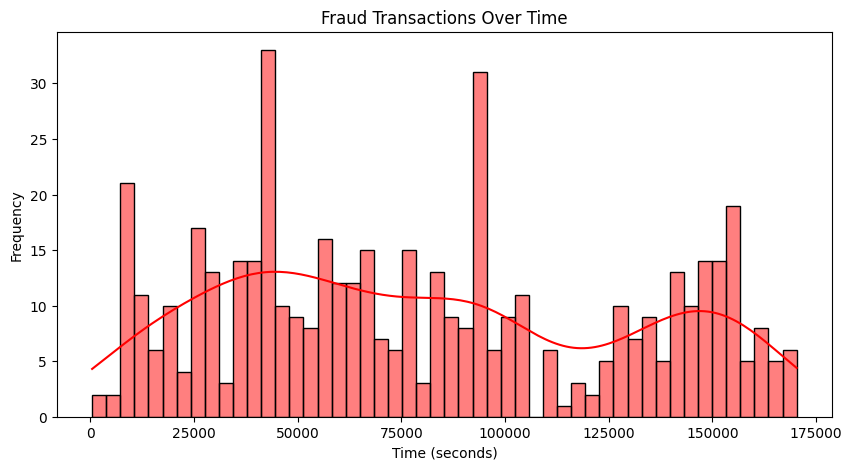

Graph generated successfully!


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "creditcard.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Fraud Transactions Over Time
plt.figure(figsize=(10,5))
df_fraud = df[df['Class'] == 1]
sns.histplot(df_fraud['Time'], bins=50, kde=True, color='red')
plt.title("Fraud Transactions Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()

print("Graph generated successfully!")

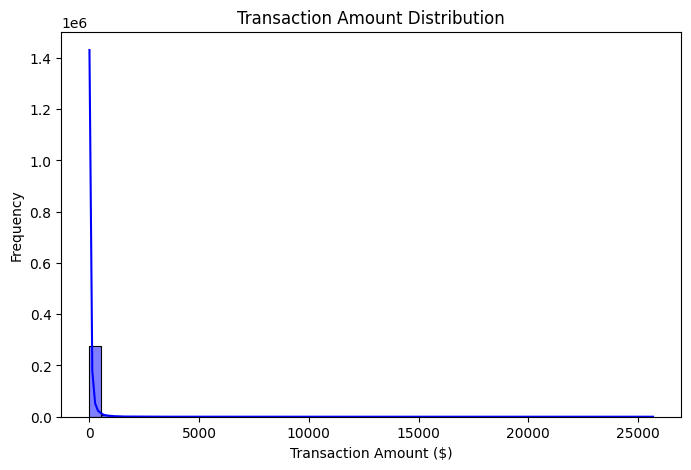

Histogram generated successfully!


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "creditcard.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Histogram of Transaction Amounts
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()

print("Histogram generated successfully!")